# Lab 5: Data Preprocessing using Python

* Outcome A:  Learning Data Preprocessing steps
* Outcome B: Applying Data preprocessing techniques to get cleaned data


### Exercise:

 Work on Bank dataset by following YouTube video:
* Load data in Pandas.
* Drop columns that aren't useful.
* Drop rows with missing values/Filling missing values using mean
* Convert categorical values to numeric values.
* Apply feature scaling/normalization


In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("bank.csv", sep=";")

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [4]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no
4520,44,entrepreneur,single,tertiary,no,1136,yes,yes,cellular,3,apr,345,2,249,7,other,no


In [5]:
def replace_marital(val):
    if val=='single':
        return 0
    else:
        return 1
    
df["marital"]=df["marital"].apply(replace_marital,1)

In [6]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,1,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,1,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,0,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,1,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,1,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [7]:
df["housing"]=df["housing"].map({"no":0,"yes":1}.get)

In [8]:
df["loan"]=df["loan"].replace({"no":0,"yes":1})

In [9]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,1,primary,no,1787,0,0,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,1,secondary,no,4789,1,1,cellular,11,may,220,1,339,4,failure,no
2,35,management,0,tertiary,no,1350,1,0,cellular,16,apr,185,1,330,1,failure,no
3,30,management,1,tertiary,no,1476,1,1,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,1,secondary,no,0,1,0,unknown,5,may,226,1,-1,0,unknown,no


In [10]:
df["job"].unique()

array(['unemployed', 'services', 'management', 'blue-collar',
       'self-employed', 'technician', 'entrepreneur', 'admin.', 'student',
       'housemaid', 'retired', 'unknown'], dtype=object)

In [11]:
df["job"].replace({"unknown":np.nan, 'unemployed':0, 'services':1, 'management':2, 'blue-collar':3,
       'self-employed':4, 'technician':5, 'entrepreneur':6, 'admin.':7, 'student':8,
       'housemaid':9, 'retired':10}, inplace=True)

In [12]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,0.0,1,primary,no,1787,0,0,cellular,19,oct,79,1,-1,0,unknown,no
1,33,1.0,1,secondary,no,4789,1,1,cellular,11,may,220,1,339,4,failure,no
2,35,2.0,0,tertiary,no,1350,1,0,cellular,16,apr,185,1,330,1,failure,no
3,30,2.0,1,tertiary,no,1476,1,1,unknown,3,jun,199,4,-1,0,unknown,no
4,59,3.0,1,secondary,no,0,1,0,unknown,5,may,226,1,-1,0,unknown,no


In [13]:
df["education"].unique()

array(['primary', 'secondary', 'tertiary', 'unknown'], dtype=object)

In [14]:
df["education"].replace({'primary':0, 'secondary':1, 'tertiary':2, 'unknown':np.nan}, inplace=True)

In [15]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,0.0,1,0.0,no,1787,0,0,cellular,19,oct,79,1,-1,0,unknown,no
1,33,1.0,1,1.0,no,4789,1,1,cellular,11,may,220,1,339,4,failure,no
2,35,2.0,0,2.0,no,1350,1,0,cellular,16,apr,185,1,330,1,failure,no
3,30,2.0,1,2.0,no,1476,1,1,unknown,3,jun,199,4,-1,0,unknown,no
4,59,3.0,1,1.0,no,0,1,0,unknown,5,may,226,1,-1,0,unknown,no


In [16]:
df["default"].replace({"no":0, "yes":1},inplace=True)

In [17]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
4516,33,1.0,1,1.0,0,-333,1,0,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,4.0,1,2.0,1,-3313,1,1,unknown,9,may,153,1,-1,0,unknown,no
4518,57,5.0,1,1.0,0,295,0,0,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,3.0,1,1.0,0,1137,0,0,cellular,6,feb,129,4,211,3,other,no
4520,44,6.0,0,2.0,0,1136,1,1,cellular,3,apr,345,2,249,7,other,no


In [18]:
mini=df["balance"].min()

In [19]:
maxi=df["balance"].max()

In [20]:
df["balance"]=df["balance"].apply(lambda v: (v-mini)/(maxi-mini))

In [21]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,0.0,1,0.0,0,0.068455,0,0,cellular,19,oct,79,1,-1,0,unknown,no
1,33,1.0,1,1.0,0,0.108750,1,1,cellular,11,may,220,1,339,4,failure,no
2,35,2.0,0,2.0,0,0.062590,1,0,cellular,16,apr,185,1,330,1,failure,no
3,30,2.0,1,2.0,0,0.064281,1,1,unknown,3,jun,199,4,-1,0,unknown,no
4,59,3.0,1,1.0,0,0.044469,1,0,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,1.0,1,1.0,0,0.039999,1,0,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,4.0,1,2.0,1,0.000000,1,1,unknown,9,may,153,1,-1,0,unknown,no
4518,57,5.0,1,1.0,0,0.048429,0,0,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,3.0,1,1.0,0,0.059731,0,0,cellular,6,feb,129,4,211,3,other,no


In [22]:
df.contact.replace({"unknown":np.nan, "telephone":0, "cellular":1}, inplace=True)

In [23]:
df.month.unique()

array(['oct', 'may', 'apr', 'jun', 'feb', 'aug', 'jan', 'jul', 'nov',
       'sep', 'mar', 'dec'], dtype=object)

In [24]:
df.month.replace({'oct':10, 'may':5, 'apr':4, 'jun':6, 'feb':2, 'aug':8, 'jan':1, 'jul':1, 'nov':11,
       'sep':9, 'mar':3, 'dec':12}, inplace=True)

In [25]:
df.poutcome.unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

In [26]:
df.poutcome=df.poutcome.map({'unknown':np.nan, 'failure':0, 'other':1, 'success':2})

In [27]:
df.pdays=df.pdays.apply(lambda v: (v-df.pdays.min())/(df.pdays.max()-df.pdays.min()))

In [28]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,0.0,1,0.0,0,0.068455,0,0,1.0,19,10,79,1,0.000000,0,NaN,no
1,33,1.0,1,1.0,0,0.108750,1,1,1.0,11,5,220,1,0.389908,4,0.0,no
2,35,2.0,0,2.0,0,0.062590,1,0,1.0,16,4,185,1,0.379587,1,0.0,no
3,30,2.0,1,2.0,0,0.064281,1,1,NaN,3,6,199,4,0.000000,0,NaN,no
4,59,3.0,1,1.0,0,0.044469,1,0,NaN,5,5,226,1,0.000000,0,NaN,no


In [29]:
df.y.replace({"no":0, "yes":1}, inplace=True)

In [30]:
df.y.unique()

array([0, 1], dtype=int64)

In [31]:
df.duration=df.duration.apply(lambda v: (v-df.duration.min())/(df.duration.max()-df.duration.min()))

In [32]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,0.0,1,0.0,0,0.068455,0,0,1.0,19,10,0.024826,1,0.000000,0,NaN,0
1,33,1.0,1,1.0,0,0.108750,1,1,1.0,11,5,0.071500,1,0.389908,4,0.0,0
2,35,2.0,0,2.0,0,0.062590,1,0,1.0,16,4,0.059914,1,0.379587,1,0.0,0
3,30,2.0,1,2.0,0,0.064281,1,1,NaN,3,6,0.064548,4,0.000000,0,NaN,0
4,59,3.0,1,1.0,0,0.044469,1,0,NaN,5,5,0.073486,1,0.000000,0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,1.0,1,1.0,0,0.039999,1,0,1.0,30,1,0.107580,5,0.000000,0,NaN,0
4517,57,4.0,1,2.0,1,0.000000,1,1,NaN,9,5,0.049321,1,0.000000,0,NaN,0
4518,57,5.0,1,1.0,0,0.048429,0,0,1.0,19,8,0.048659,11,0.000000,0,NaN,0
4519,28,3.0,1,1.0,0,0.059731,0,0,1.0,6,2,0.041377,4,0.243119,3,1.0,0


In [33]:
df.describe()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,4521.000000,4483.000000,4521.000000,4334.000000,4521.000000,4521.000000,4521.000000,4521.000000,3197.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,816.000000,4521.000000
mean,41.170095,4.037252,0.735457,1.155053,0.016810,0.063565,0.566025,0.152842,0.905849,15.915284,5.229816,0.086051,2.793630,0.046751,0.542579,0.557598,0.115240
std,10.576211,2.534139,0.441138,0.666325,0.128575,0.040397,0.495676,0.359875,0.292084,8.247667,2.973192,0.086017,3.109807,0.114818,1.693562,0.750699,0.319347
min,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,33.000000,2.000000,0.000000,1.000000,0.000000,0.045395,0.000000,0.000000,1.000000,9.000000,4.000000,0.033102,1.000000,0.000000,0.000000,0.000000,0.000000
50%,39.000000,3.000000,1.000000,1.000000,0.000000,0.050429,1.000000,0.000000,1.000000,16.000000,5.000000,0.059914,2.000000,0.000000,0.000000,0.000000,0.000000
75%,49.000000,5.000000,1.000000,2.000000,0.000000,0.064335,1.000000,0.000000,1.000000,21.000000,8.000000,0.107580,3.000000,0.000000,0.000000,1.000000,0.000000
max,87.000000,10.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,31.000000,12.000000,1.000000,50.000000,1.000000,25.000000,2.000000,1.000000


In [34]:
df.to_csv("preprocessed.csv", index=False)

In [35]:
new_df=pd.read_csv("preprocessed.csv")

In [36]:
new_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,0.0,1,0.0,0,0.068455,0,0,1.0,19,10,0.024826,1,0.000000,0,NaN,0
1,33,1.0,1,1.0,0,0.108750,1,1,1.0,11,5,0.071500,1,0.389908,4,0.0,0
2,35,2.0,0,2.0,0,0.062590,1,0,1.0,16,4,0.059914,1,0.379587,1,0.0,0
3,30,2.0,1,2.0,0,0.064281,1,1,NaN,3,6,0.064548,4,0.000000,0,NaN,0
4,59,3.0,1,1.0,0,0.044469,1,0,NaN,5,5,0.073486,1,0.000000,0,NaN,0


In [37]:
new_df.corr()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
age,1.000000,0.246948,0.410768,-0.190484,-0.017885,0.083820,-0.193888,-0.011250,-0.204200,-0.017853,0.052172,-0.002367,-0.005148,-0.008894,-0.003511,0.048548,0.045092
job,0.246948,1.000000,0.022194,-0.159257,0.000797,0.046488,-0.140553,0.009586,-0.084848,0.000524,-0.001805,-0.009160,-0.041718,0.001408,0.022125,0.073736,0.066550
marital,0.410768,0.022194,1.000000,-0.169967,-0.007391,-0.007525,0.041449,0.048496,-0.056938,-0.006769,0.026459,-0.024560,0.008093,-0.020693,-0.035558,-0.009813,-0.045815
education,-0.190484,-0.159257,-0.169967,1.000000,-0.011623,0.056585,-0.072716,-0.024752,0.117748,0.017107,0.096870,-0.011193,0.009714,0.011531,0.030396,0.023715,0.055368
default,-0.017885,0.000797,-0.007391,-0.011623,1.000000,-0.070886,0.006881,0.063994,0.023372,-0.013261,-0.021104,-0.011615,-0.012348,-0.026317,-0.026656,0.025369,0.001303
balance,0.083820,0.046488,-0.007525,0.056585,-0.070886,1.000000,-0.050227,-0.071349,-0.036326,-0.008677,0.146207,-0.015950,-0.009976,0.009437,0.026196,0.020393,0.017905
housing,-0.193888,-0.140553,0.041449,-0.072716,0.006881,-0.050227,1.000000,0.018451,0.046484,-0.031291,-0.087535,0.015740,-0.003574,0.116893,0.038621,-0.253137,-0.104683
loan,-0.011250,0.009586,0.048496,-0.024752,0.063994,-0.071349,0.018451,1.000000,0.007166,-0.004879,-0.095280,-0.004997,0.017120,-0.031086,-0.022115,-0.096067,-0.070517
contact,-0.204200,-0.084848,-0.056938,0.117748,0.023372,-0.036326,0.046484,0.007166,1.000000,-0.055509,0.081775,0.027292,-0.033973,0.024204,0.001642,-0.037807,-0.002108
day,-0.017853,0.000524,-0.006769,0.017107,-0.013261,-0.008677,-0.031291,-0.004879,-0.055509,1.000000,-0.027238,-0.024629,0.160706,-0.094352,-0.059114,0.019975,-0.011244


In [45]:
import matplotlib.pyplot as plt 
%matplotlib inline

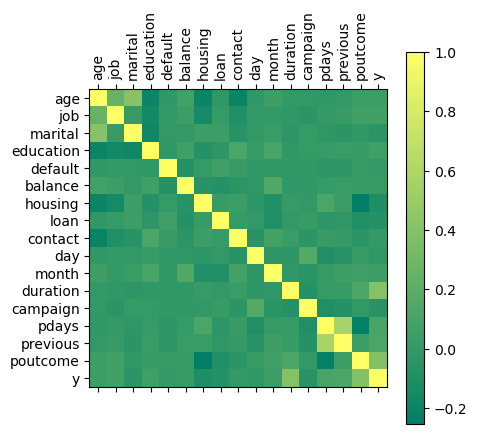

In [47]:
plt.matshow(new_df.corr(), cmap="summer")
plt.colorbar()

plt.xticks(list(range(len(new_df.columns))), new_df.columns, rotation="vertical")
plt.yticks(list(range(len(new_df.columns))), new_df.columns, rotation="horizontal")

plt.show()